# Count of each hospital


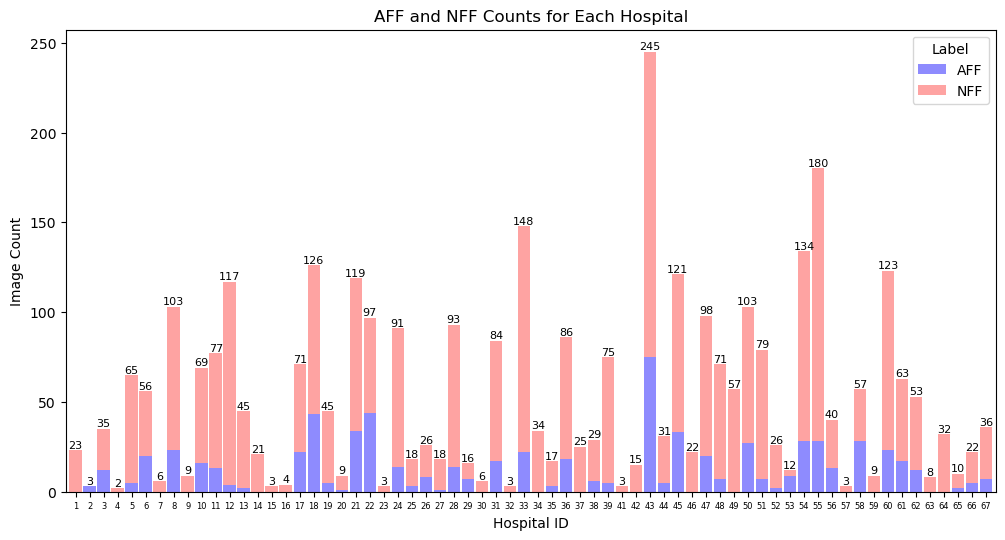

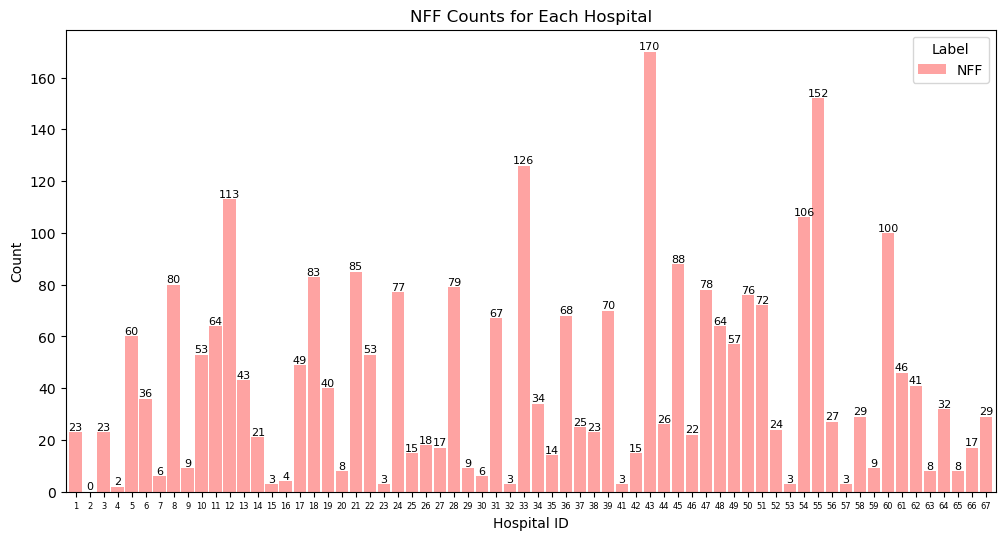

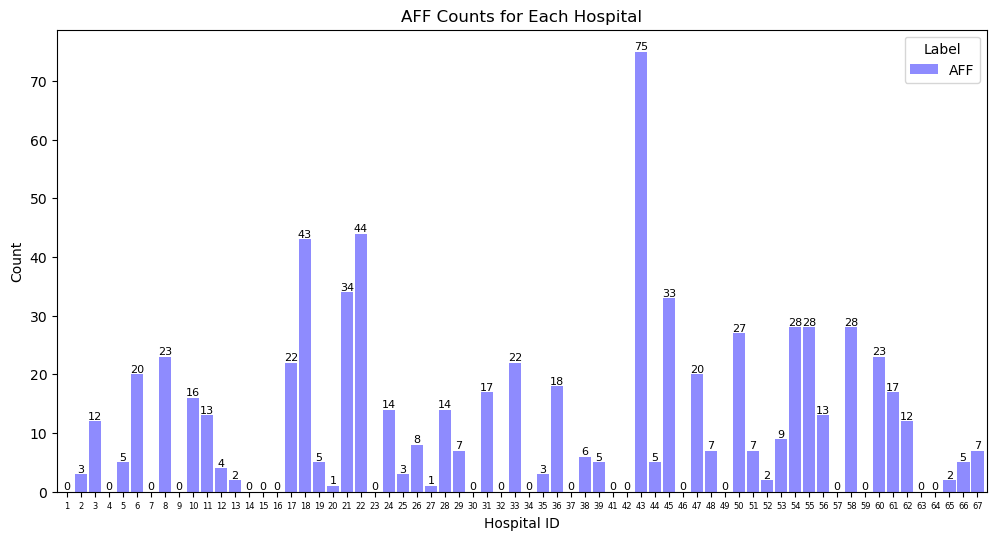

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# read csv
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# filter HospitalID 100
filtered_data = data[data['HospitalID'] != 100]

# group by hospital ID, count
hospital_label_counts = filtered_data.groupby(['HospitalID', 'Label']).size().unstack().fillna(0)
#-------------------------------------------------------------------------------------------------
# total count
# hospital_label_counts = hospital_label_counts[['NFF', 'AFF']]

hospital_label_counts['Total'] = hospital_label_counts['AFF'] + hospital_label_counts['NFF']

colors = ['#8E8BFE','#FEA3A2']

width = 0.9
# barchat

ax = hospital_label_counts[['AFF', 'NFF']].plot(kind='bar', stacked=True, figsize=(12, 6),color=colors,width=width)

plt.xlabel('Hospital ID')
plt.ylabel('Image Count')
plt.title('AFF and NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()
#-------------------------------------------------------------------------------------------------
hospital_label_counts['Total'] = hospital_label_counts['NFF']

colors = ['#FEA3A2']

# barchat
ax = hospital_label_counts[['NFF']].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors,width=width)
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('NFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()
#-------------------------------------------------------------------------------------------------
# total count
hospital_label_counts['Total'] = hospital_label_counts['AFF']
colors = ['#8E8BFE']


# barchat
ax = hospital_label_counts[['AFF']].plot(kind='bar', stacked=True, figsize=(12, 6),color=colors,width=width)
plt.xlabel('Hospital ID')
plt.ylabel('Count')
plt.title('AFF Counts for Each Hospital')
plt.xticks(rotation=0, fontsize=6)  #  x-label font size
plt.legend(title='Label')

# show AFF NFF count in bar，set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

plt.show()


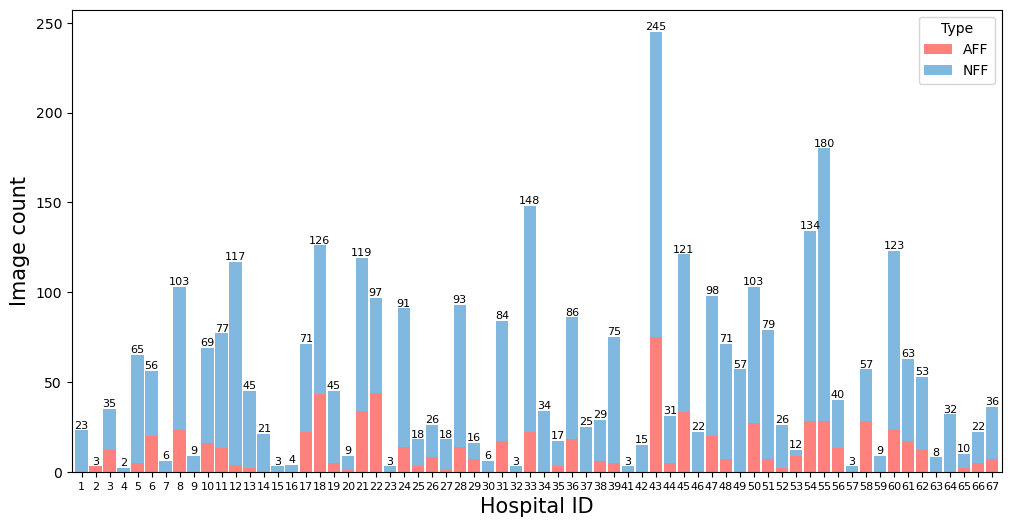

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# filter HospitalID 100
filtered_data = data[data['HospitalID'] != 100]

# group by hospital ID, count
hospital_label_counts = filtered_data.groupby(['HospitalID', 'Label']).size().unstack().fillna(0)
hospital_label_counts['Total'] = hospital_label_counts['AFF'] + hospital_label_counts['NFF']

colors = [(254/255, 129/255, 125/255), (129/255, 184/255, 223/255)]
# colors = ['#8E8BFE','#FEA3A2']
# 其余代码保持不变
width = 0.9

# barchart
fig, ax = plt.subplots(figsize=(12, 6))
hospital_label_counts[['AFF', 'NFF']].plot(kind='bar', stacked=True, ax=ax, color=colors, width=width)

plt.xlabel('Hospital ID', fontsize=15)
plt.ylabel('Image count', fontsize=15)
# plt.title('AFF and NFF Counts for Each Hospital', fontsize=12)
plt.xticks(rotation=0, fontsize=8)  # x-label font size
plt.yticks(fontsize=10)  # y-label font size
plt.legend(title='Type', fontsize=10)

# show AFF NFF count in bar, set font size
for idx, (aff, nff, total) in enumerate(zip(hospital_label_counts['AFF'], hospital_label_counts['NFF'], hospital_label_counts['Total'])):
    ax.text(idx, total, int(total), ha='center', va='bottom', fontsize=8)  # show total count

# Set transparent background
plt.gcf().set_facecolor('None')
ax.set_facecolor('None')

# Hide grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.show()


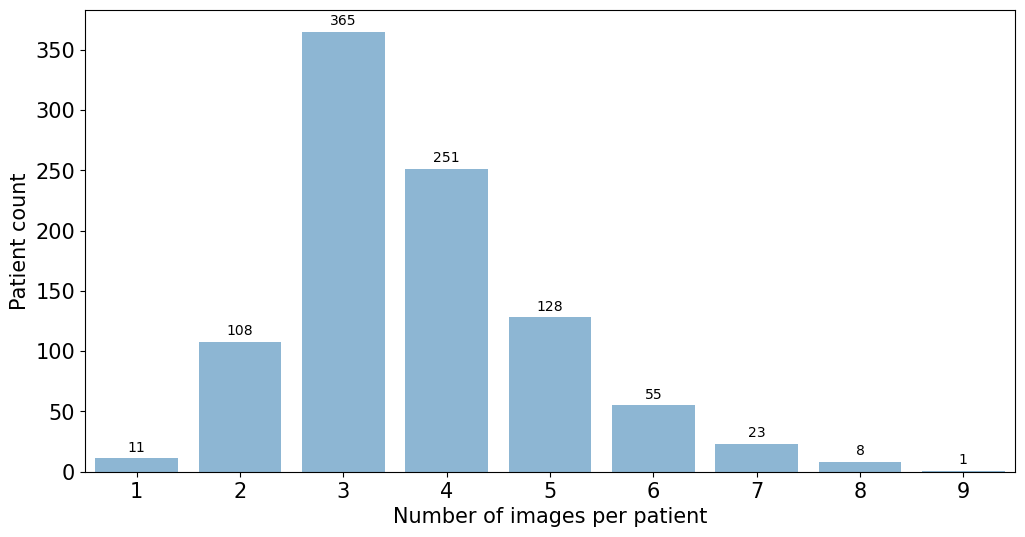

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]


# 按PatientID分组并计算每个患者的图片数量
patient_image_counts = data.groupby('PatientID').size().reset_index(name='Image Count')

# 绘制柱形图，并取消不同颜色
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Image Count', data=patient_image_counts, color=(129/255, 184/255, 223/255))

# 在每个柱形上显示患者数量
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.xlabel('Number of images per patient', fontsize=15)
plt.ylabel('Patient count',fontsize=15)
# plt.title('Distribution of Number of Images per Patient')
plt.xticks(rotation=0, fontsize=15)  # x-label font size
plt.yticks(fontsize=15)  # y-label font size
plt.show()


In [20]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]


# 统计医院数量
total_hospitals = data['HospitalID'].nunique()

# 打印结果
print("总医院数量:", total_hospitals)

# 打印结果
print("AFF数量:", aff_count)
print("NFF数量:", nff_count)

aff_unique_patients = aff_data['PatientID'].nunique()
nff_unique_patients = nff_data['PatientID'].nunique()

# 打印结果
print("AFF唯一患者数量:", aff_unique_patients)
print("NFF唯一患者数量:", nff_unique_patients)



总医院数量: 66
AFF数量: 713
NFF数量: 2817
AFF唯一患者数量: 206
NFF唯一患者数量: 744


# 医院层面的数据统计

In [21]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]

# 统计医院数量
total_hospitals = data['HospitalID'].nunique()

# 计算 AFF 和 NFF 的医院层面统计信息
aff_hospital_stats = aff_data.groupby('HospitalID').size().describe()
nff_hospital_stats = nff_data.groupby('HospitalID').size().describe()

# 打印 AFF 统计信息
print("AFF数量:", aff_count)
print("AFF医院层面统计信息:")
print(aff_hospital_stats)

# 打印 NFF 统计信息
print("\nNFF数量:", nff_count)
print("NFF医院层面统计信息:")
print(nff_hospital_stats)


AFF数量: 713
AFF医院层面统计信息:
count    46.000000
mean     15.500000
std      14.333721
min       1.000000
25%       5.000000
50%      12.500000
75%      22.000000
max      75.000000
dtype: float64

NFF数量: 2817
NFF医院层面统计信息:
count     65.000000
mean      43.338462
std       38.323572
min        2.000000
25%       14.000000
50%       29.000000
75%       68.000000
max      170.000000
dtype: float64


# 患者层面的数据统计

In [22]:
import pandas as pd

# 读取数据
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)
data = data[data['HospitalID'] != 100]

# 分别统计 AFF 和 NFF 的数量
aff_data = data[data['Label'] == 'AFF']
nff_data = data[data['Label'] == 'NFF']

# 统计 AFF 和 NFF 的数量
aff_count = aff_data.shape[0]
nff_count = nff_data.shape[0]

# 统计医院数量
total_hospitals = data['PatientID'].nunique()

# 计算 AFF 和 NFF 的医院层面统计信息
aff_hospital_stats = aff_data.groupby('PatientID').size().describe()
nff_hospital_stats = nff_data.groupby('PatientID').size().describe()

# 打印 AFF 统计信息
# print("AFF数量:", aff_count)
print("AFF患者层面统计信息:")
print(aff_hospital_stats)

# 打印 NFF 统计信息
# print("\nNFF数量:", nff_count)
print("NFF患者层面统计信息:")
print(nff_hospital_stats)


AFF患者层面统计信息:
count    206.000000
mean       3.461165
std        1.093639
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        8.000000
dtype: float64
NFF患者层面统计信息:
count    744.000000
mean       3.786290
std        1.304831
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        9.000000
dtype: float64


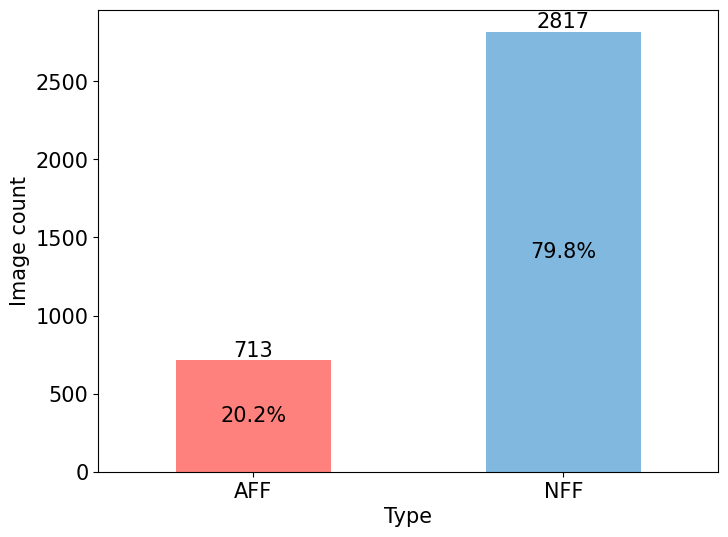

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
data = data[data['HospitalID'] != 100]

# 按照标签分组并计算AFF和NFF的数量
label_counts = data.groupby('Label').size()

# 计算比例
label_proportions = label_counts / label_counts.sum()

# 设置绘图风格
# sns.set(style="whitegrid")
sns.set_palette("pastel")
colors = [(254/255, 129/255, 125/255), (129/255, 184/255, 223/255)]

# 绘制条形图
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', label='Count', color=colors)
ax.set_ylabel('Image count',fontsize=15)
ax.set_xlabel('Type',fontsize=15)
# ax.set_title('Distribution of AFF and NFF')
# ax.legend(loc='upper right')

# 在每个条形中间显示比例
for idx, (count, proportion) in enumerate(zip(label_counts, label_proportions)):
    ax.annotate(f'{proportion:.1%}', (idx, count / 2), ha='center', va='center',fontsize=15)  # 显示比例
    ax.annotate(str(count), (idx, count), ha='center', va='bottom',fontsize=15)  # 显示数量

plt.xticks(rotation=0,fontsize=15)  # 使X轴标签水平显示
plt.yticks(rotation=0,fontsize=15)  # 使X轴标签水平显示

plt.show()


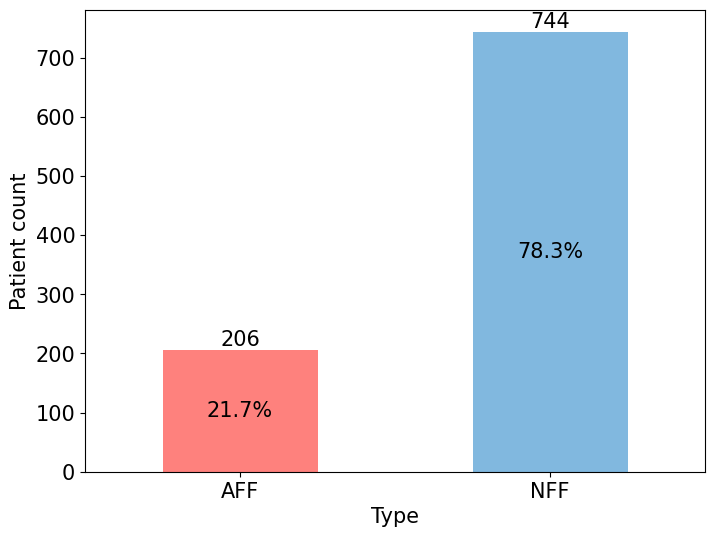

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
data = pd.read_csv(file_path)

# 过滤掉HospitalID为100的数据
filtered_data = data[data['HospitalID'] != 100]

# 根据Label分组并计算AFF和NFF的患者数量
patient_counts = filtered_data.groupby('Label')['PatientID'].nunique()

# 计算比例
patient_proportions = patient_counts / patient_counts.sum()

# 设置绘图风格
sns.set_palette("pastel")
colors = [(254/255, 129/255, 125/255), (129/255, 184/255, 223/255)]

# 绘制条形图
plt.figure(figsize=(8, 6))
ax = patient_counts.plot(kind='bar', label='Count', color=colors)
ax.set_ylabel('Patient count',fontsize=15)
ax.set_xlabel('Type',fontsize=15)
# ax.set_title('Number of Patients with AFF and NFF Labels')

# 在每个条形中间显示数量和比例
for idx, (count, proportion) in enumerate(zip(patient_counts, patient_proportions)):
    ax.annotate(f'{proportion:.1%}', (idx, count / 2), ha='center', va='center',fontsize=15)  # 显示比例
    ax.annotate(str(count), (idx, count), ha='center', va='bottom',fontsize=15)  # 显示数量

plt.xticks(rotation=0, fontsize=15)  # 使X轴标签水平显示
plt.yticks(rotation=0, fontsize=15)  # 使X轴标签水平显示

plt.show()


In [25]:
import pandas as pd

# 读取CSV文件
file_path = '/local/data1/honzh073/local_repository/FL/code/csv_json_files/2_image_data.csv'
df = pd.read_csv(file_path)

# 统计AFF和NFF的图片数量
aff_image_count = len(df[df['Label'] == 'AFF'])
nff_image_count = len(df[df['Label'] == 'NFF'])

# 计算AFF和NFF的图片数量百分比
total_images = len(df)
aff_image_percentage = round((aff_image_count / total_images) * 100,2)
nff_image_percentage = round((nff_image_count / total_images) * 100,2)

# 统计AFF和NFF的患者数量
aff_patient_count = df[df['Label'] == 'AFF']['PatientID'].nunique()
nff_patient_count = df[df['Label'] == 'NFF']['PatientID'].nunique()

# 计算AFF和NFF的患者数量百分比
total_patients = df['PatientID'].nunique()
aff_patient_percentage = round((aff_patient_count / total_patients) * 100 ,2)
nff_patient_percentage = round((nff_patient_count / total_patients) * 100, 2)

# 打印结果
print("总图片:", total_images)
print("总患者:", total_patients)
print("AFF图片:", aff_image_count, "，百分比:", aff_image_percentage, "%")
print("NFF图片:", nff_image_count, "，百分比:", nff_image_percentage, "%")
print("AFF患者:", aff_patient_count, "，百分比:", aff_patient_percentage, "%")
print("NFF患者:", nff_patient_count, "，百分比:", nff_patient_percentage, "%")


总图片: 4342
总患者: 1163
AFF图片: 868 ，百分比: 19.99 %
NFF图片: 3474 ，百分比: 80.01 %
AFF患者: 247 ，百分比: 21.24 %
NFF患者: 916 ，百分比: 78.76 %


In [26]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy  # 确保导入了scipy库

# 定义函数来计算图片的像素、亮度和对比度
def calculate_image_properties(image):
    # 将图像转换为NumPy数组
    image_array = np.array(image)
    
    # 计算图像的像素、亮度和对比度
    pixels = np.prod(image_array.shape)
    brightness = np.mean(image_array)
    contrast = image_array.std()
    
    return pixels, brightness, contrast

# 定义函数来处理文件夹中的所有图像
def process_images(folder_path):
    # 初始化存储结果的列表
    widths, heights, pixel_counts, brightness_values, contrast_values = [], [], [], [], []
    
    # 遍历文件夹中的所有图像
    for filename in os.listdir(folder_path):
        # 生成完整的文件路径
        file_path = os.path.join(folder_path, filename)
        
        # 打开图像
        image = Image.open(file_path)
        
        # 获取图像的宽度和高度
        width, height = image.size
        widths.append(width)
        heights.append(height)
        
        # 计算图像的像素、亮度和对比度
        pixels, brightness, contrast = calculate_image_properties(image)
        pixel_counts.append(pixels)
        brightness_values.append(brightness)
        contrast_values.append(contrast)
    
    # 计算宽度、高度、数量、亮度和对比度的平均值、标准差和偏度
    width_mean, width_std, width_skewness = np.mean(widths), np.std(widths), scipy.stats.skew(widths)
    height_mean, height_std, height_skewness = np.mean(heights), np.std(heights), scipy.stats.skew(heights)
    pixel_mean, pixel_std, pixel_skewness = np.mean(pixel_counts), np.std(pixel_counts), scipy.stats.skew(pixel_counts)
    brightness_mean, brightness_std, brightness_skewness = np.mean(brightness_values), np.std(brightness_values), scipy.stats.skew(brightness_values)
    contrast_mean, contrast_std, contrast_skewness = np.mean(contrast_values), np.std(contrast_values), scipy.stats.skew(contrast_values)
    
    # 返回计算结果
    return (width_mean, width_std, width_skewness), (height_mean, height_std, height_skewness), (pixel_mean, pixel_std, pixel_skewness), (brightness_mean, brightness_std, brightness_skewness), (contrast_mean, contrast_std, contrast_skewness)

# 指定文件夹路径
folder_path = '/local/data1/honzh073/data/8bit_raw'

# 处理图像并获取统计信息
width_stats, height_stats, pixel_stats, brightness_stats, contrast_stats = process_images(folder_path)

# 打印结果
print("宽度统计信息 (平均值, 标准差, 偏度):", width_stats)
print("高度统计信息 (平均值, 标准差, 偏度):", height_stats)
print("像素数量统计信息 (平均值, 标准差, 偏度):", pixel_stats)
print("亮度统计信息 (平均值, 标准差, 偏度):", brightness_stats)
print("对比度统计信息 (平均值, 标准差, 偏度):", contrast_stats)


import pandas as pd

# 定义统计信息
statistics = {
    '属性': ['宽度', '高度', '像素数量', '亮度', '对比度'],
    '平均值': [2205.1427913403963, 2721.333947489636, 6090662.42860433, 72.76635668492636, 46.961547387447055],
    '标准差': [625.0274428741335, 429.0836705767638, 2305397.395951394, 28.468405588878927, 12.137622294551806],
    '偏度': [0.10201873121306015, 0.22697427507589255, 0.9255945732385172, 0.27038716563517934, 0.17274469012846913]
}

# 创建DataFrame
df = pd.DataFrame(statistics)

# 输出DataFrame为表格
print(df)


宽度统计信息 (平均值, 标准差, 偏度): (2205.1427913403963, 625.0274428741335, 0.10201873121306015)
高度统计信息 (平均值, 标准差, 偏度): (2721.333947489636, 429.0836705767638, 0.22697427507589255)
像素数量统计信息 (平均值, 标准差, 偏度): (6090662.42860433, 2305397.395951394, 0.9255945732385172)
亮度统计信息 (平均值, 标准差, 偏度): (72.76635668492636, 28.468405588878927, 0.27038716563517934)
对比度统计信息 (平均值, 标准差, 偏度): (46.961547387447055, 12.137622294551806, 0.17274469012846913)
     属性           平均值           标准差        偏度
0    宽度  2.205143e+03  6.250274e+02  0.102019
1    高度  2.721334e+03  4.290837e+02  0.226974
2  像素数量  6.090662e+06  2.305397e+06  0.925595
3    亮度  7.276636e+01  2.846841e+01  0.270387
4   对比度  4.696155e+01  1.213762e+01  0.172745
